In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import matplotlib as mpl
from mplsoccer.pitch import Pitch

from scipy.spatial import ConvexHull
from scipy import stats

In [28]:
df=pd.read_csv("C:/Users/K Raghunandan/OneDrive/Desktop/Raghu/Kickoff/CSV Files/convextutorial.csv")
df.head()

,eventId,minute,second,teamId,x,y,playerId,type/displayName,type/value
0,2,0,0.0,65,0.0,0.0,NaN,Start,32
1,2,0,0.0,833,0.0,0.0,NaN,Start,32
2,3,0,1.0,833,50.8,51.5,303800.0,Pass,1
3,4,0,4.0,833,28.4,58.4,316957.0,Pass,1
4,5,0,7.0,833,66.6,24.7,303800.0,BallTouch,61


In [29]:
df=df.fillna(0)

In [30]:
df["y"]=0.8*df["y"]
df["x"]=1.2*df["x"]

In [31]:
df=df[df["teamId"]==65]

In [32]:
df

,eventId,minute,second,teamId,x,y,playerId,type/displayName,type/value
0,2,0,0.0,65,0.00,0.00,0.0,Start,32
5,3,0,8.0,65,33.48,64.48,5.0,BallRecovery,49
6,4,0,9.0,65,36.72,51.44,5.0,Pass,1
7,5,0,13.0,65,31.68,17.92,28.0,Pass,1
8,6,0,18.0,65,35.04,30.16,4.0,Pass,1
...,...,...,...,...,...,...,...,...,...
1569,1016,92,3.0,65,110.64,50.40,17.0,Dispossessed,50
1574,1017,92,6.0,65,90.72,66.80,5.0,Interception,8
1576,1018,92,7.0,65,0.00,0.00,0.0,End,30
1577,1019,0,0.0,65,0.00,0.00,0.0,End,30


In [33]:
df["playerId"]=df["playerId"].astype(int)

In [34]:
players=df["playerId"].unique()

In [35]:
players

array([ 0,  5, 28,  4, 23,  7, 11, 21,  1,  9, 18, 16, 17, 12])

In [36]:
starters=players[1:12]

In [37]:
starters

array([ 5, 28,  4, 23,  7, 11, 21,  1,  9, 18, 16])

In [38]:
#Single Player

Text(0.5, 1.0, 'Convex Hull or Frenkie De Jong vs Elche CF (2021)')

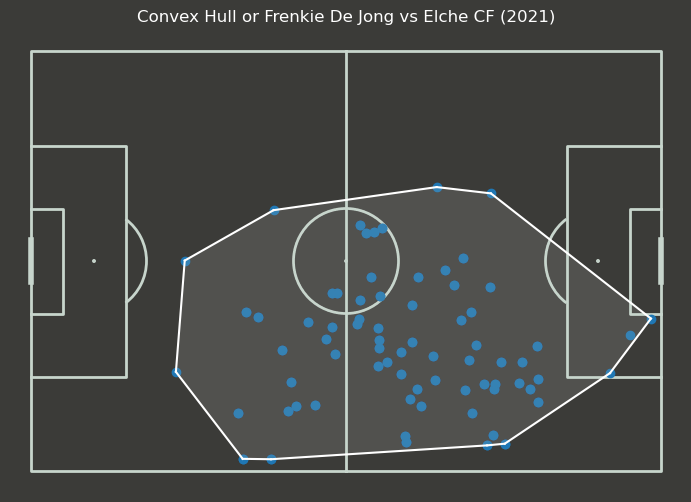

In [54]:
fig, ax = plt.subplots(figsize=(10,6))
fig.set_facecolor("#3b3b38")
ax.patch.set_facecolor("#3b3b38")

pitch = Pitch(pitch_type='statsbomb', pitch_color='#3b3b38', line_color='#c7d5cc')
pitch.draw(ax=ax, constrained_layout=False, tight_layout=True)
plt.gca().invert_yaxis()

df1=df[df["playerId"]==21]
df1=df1[df1["type/value"]==1]

df1=df1[(np.abs(stats.zscore(df1[["x","y"]]))<2)]

points=df1[["x","y"]].values

hull=ConvexHull(df1[["x","y"]])
plt.scatter(df1["x"],df1["y"])

for i in hull.simplices:
    plt.plot(points[i,0],points[i,1],color="white")
    plt.fill(points[hull.vertices,0],points[hull.vertices,1],color="white",alpha=.01)

plt.title("Convex Hull or Frenkie De Jong vs Elche CF (2021)",color="white")

In [55]:
#Multiple Players

Text(0.5, 1.0, 'Barcelona CF Convex Hulls vs Elche CF (2021)')

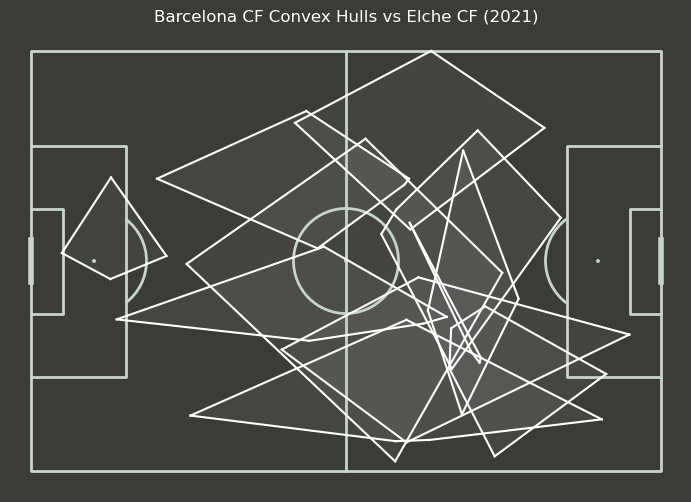

In [62]:
fig, ax = plt.subplots(figsize=(10,6))
fig.set_facecolor("#3b3b38")
ax.patch.set_facecolor("#3b3b38")

pitch = Pitch(pitch_type='statsbomb', pitch_color='#3b3b38', line_color='#c7d5cc')
pitch.draw(ax=ax, constrained_layout=False, tight_layout=True)
plt.gca().invert_yaxis()

for player in starters:
    df2=df[df["playerId"]==player]
    df2=df2[df2["type/value"]==1]

    df2=df2[(np.abs(stats.zscore(df2[["x","y"]]))<.2)]

    points=df2[["x","y"]].values

    try:
        hull=ConvexHull(df2[["x","y"]])
    except:
        pass

    try:
        for i in hull.simplices:
            plt.plot(points[i,0],points[i,1],color="white")
            plt.fill(points[hull.vertices,0],points[hull.vertices,1],color="white",alpha=.01)
    except:
        pass
plt.title("Barcelona CF Convex Hulls vs Elche CF (2021)",color="white")